In [ ]:
#Step:1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Step:2 Load Dataset

In [2]:
df= pd.read_csv("ResumeDataset.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
# Step:3 Dataset Overview

In [4]:
df.shape

(962, 2)

In [5]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
# Checking Missing Values

In [8]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [9]:
# Step:4 Text Cleaning Function

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)


In [11]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [12]:
#Step:5 Apply Cleaning on text columns

In [13]:
df.columns


Index(['Category', 'Resume'], dtype='object')

In [18]:
df['cleaned_resume'] = df['Resume'].apply(clean_text)
df[['Resume', 'cleaned_resume']].head()


,Resume,cleaned_resume
0,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may b e uit rgpv data sci...
2,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [15]:
#Step:6 TFI-DF Vectorization(Term Frequency-Inverse Document Frequency)

In [19]:
tfidf = TfidfVectorizer(max_features=3000)
resume_vectors = tfidf.fit_transform(df['cleaned_resume'])


In [20]:
tfidf

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [21]:
resume_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 136767 stored elements and shape (962, 3000)>

In [22]:
resume_vectors.shape


(962, 3000)

In [23]:
# Step:7 Build A description Matcher

In [24]:
job_description = """
Looking for a data analyst with strong skills in Python, SQL, Power BI, data visualization,
machine learning, statistics, and business analysis.
"""


In [25]:
cleaned_jd = clean_text(job_description)
jd_vector = tfidf.transform([cleaned_jd])


In [26]:
cleaned_jd

'looking data analyst strong skill python sql power bi data visualization machine learning statistic business analysis'

In [27]:
jd_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (1, 3000)>

In [28]:
# Step:8 Cosine Similarity (Ai Matching Engine)

In [29]:
similarity_scores = cosine_similarity(jd_vector, resume_vectors)
similarity_scores

array([[1.65936208e-01, 1.14671648e-01, 1.85326211e-01, 1.41018811e-01,
        1.20947864e-01, 1.78547302e-01, 4.96589342e-01, 2.43135419e-01,
        2.28673583e-01, 3.32509928e-01, 1.65936208e-01, 1.14671648e-01,
        1.85326211e-01, 1.41018811e-01, 1.20947864e-01, 1.78547302e-01,
        4.96589342e-01, 2.43135419e-01, 2.28673583e-01, 3.32509928e-01,
        1.65936208e-01, 1.14671648e-01, 1.85326211e-01, 1.41018811e-01,
        1.20947864e-01, 1.78547302e-01, 4.96589342e-01, 2.43135419e-01,
        2.28673583e-01, 3.32509928e-01, 1.65936208e-01, 1.14671648e-01,
        1.85326211e-01, 1.41018811e-01, 1.20947864e-01, 1.78547302e-01,
        4.96589342e-01, 2.43135419e-01, 2.28673583e-01, 3.32509928e-01,
        8.97746022e-03, 1.28280969e-02, 7.55491641e-03, 6.73794160e-03,
        6.73794160e-03, 1.19684197e-02, 8.19546518e-03, 5.92154490e-03,
        3.23385420e-03, 2.01136960e-03, 1.19615049e-02, 8.97746022e-03,
        1.28280969e-02, 7.55491641e-03, 6.73794160e-03, 6.737941

In [ ]:
# Step:8 Get Top Matching Resume

In [30]:
top_matches = similarity_scores[0].argsort()[-10:][::-1]

df.iloc[top_matches][['Category', 'Resume']].head(10)
df

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may b e uit rgpv data sci...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge m power poin...


In [ ]:
# Step:9  Add Matching Score Percentage

In [31]:
top_scores = similarity_scores[0][top_matches]

result_df = df.iloc[top_matches][['Category']].copy()
result_df['Match %'] = (top_scores * 100).round(2)

result_df


,Category,Match %
16,Data Science,49.66
26,Data Science,49.66
36,Data Science,49.66
6,Data Science,49.66
9,Data Science,33.25
29,Data Science,33.25
19,Data Science,33.25
39,Data Science,33.25
730,Database,25.32
741,Database,25.32


In [32]:
# Steo:10 Explorarory Data Analysis

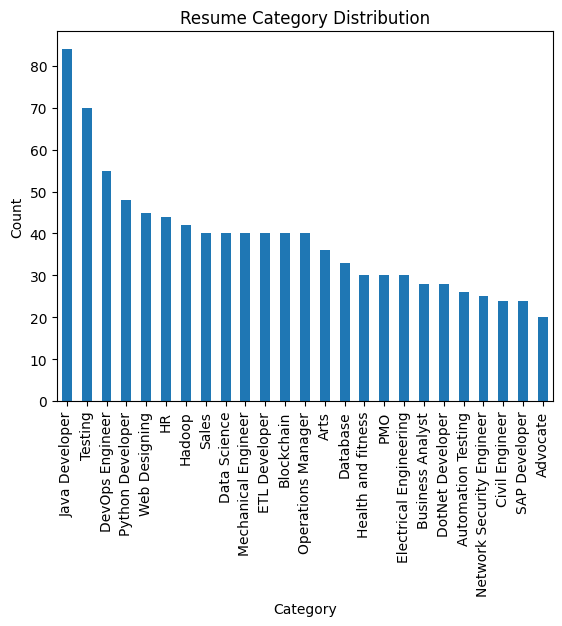

In [33]:
plt.figure()
df['Category'].value_counts().plot(kind='bar')
plt.title("Resume Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [34]:
# Top Resume Match

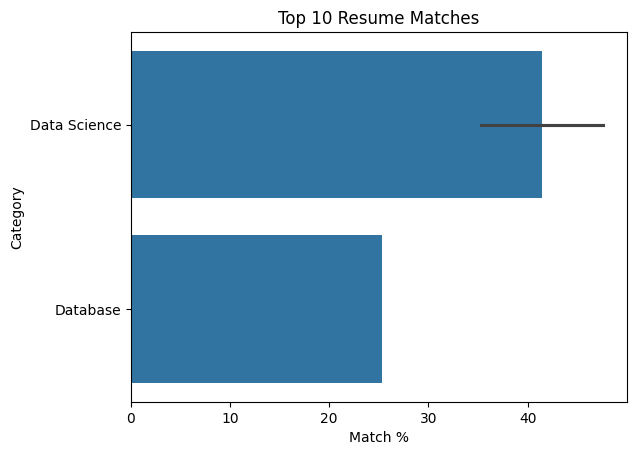

In [35]:
plt.figure()
sns.barplot(x='Match %', y='Category', data=result_df)
plt.title("Top 10 Resume Matches")
plt.show()


In [36]:
# Similar Score Distribution

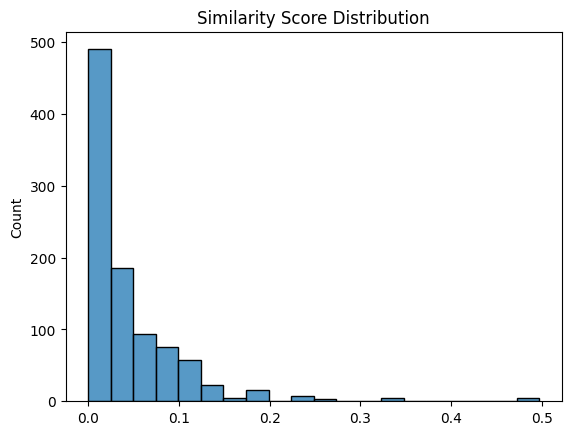

In [37]:
plt.figure()
sns.histplot(similarity_scores[0], bins=20)
plt.title("Similarity Score Distribution")
plt.show()


In [38]:
# Word Importance TFI-DF

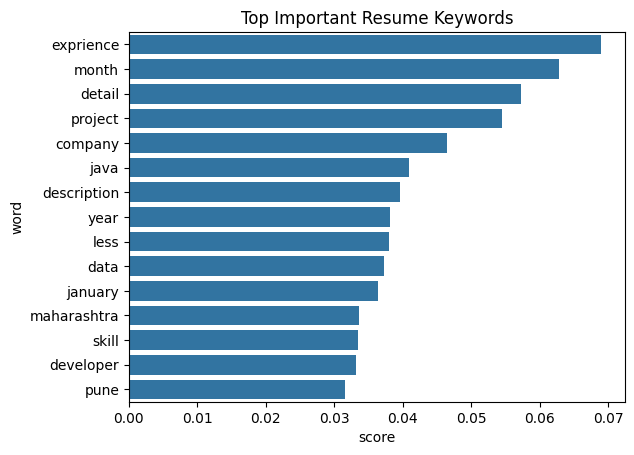

In [39]:
feature_names = tfidf.get_feature_names_out()
scores = resume_vectors.mean(axis=0).A1
top_words = pd.DataFrame({'word': feature_names, 'score': scores}).sort_values(by='score', ascending=False).head(15)

plt.figure()
sns.barplot(x='score', y='word', data=top_words)
plt.title("Top Important Resume Keywords")
plt.show()


In [40]:
def rank_resumes(job_desc, df, vectorizer, vectors, top_n=10):
    clean_jd = clean_text(job_desc)
    jd_vector = vectorizer.transform([clean_jd])
    scores = cosine_similarity(jd_vector, vectors)[0]
    
    top_idx = scores.argsort()[-top_n:][::-1]
    results = df.iloc[top_idx][['Category']].copy()
    results['Match %'] = (scores[top_idx] * 100).round(2)
    
    return results


In [41]:
rank_resumes(job_description, df, tfidf, resume_vectors)


,Category,Match %
16,Data Science,49.66
26,Data Science,49.66
36,Data Science,49.66
6,Data Science,49.66
9,Data Science,33.25
29,Data Science,33.25
19,Data Science,33.25
39,Data Science,33.25
730,Database,25.32
741,Database,25.32
